**SERGIO RODRIGUEZ BAUTISTA - SANDY ATENCIO HERNANDEZ**

In [4]:
#SE IMPORTAN LIBRERIAS DE BAYES, DE SELECIONES DE MEJORES DATOS Y DE SELECCION DE DATOS DE ENTRENAMIENTO
from   sklearn.naive_bayes import GaussianNB;
from   sklearn.feature_selection import SelectKBest;
import sklearn.model_selection as ms;
import matplotlib.pyplot as plt;
import pandas as pd;
import numpy as np;
import seaborn as sns;
from   statistics import mode, StatisticsError;
import warnings;
#SE CONFIGURA EL TAMAÑO DEL GRAFICO DE CORRELACIÓN
sns.set(rc={'figure.figsize':(16,10)});

In [6]:
#SE CARGA EL DATASET DE TRANSFUSION DE SANGRE
data  = pd.read_csv('transfusion.data', delimiter=',', decimal='.');
datos = pd.DataFrame( data );
#DESCRIPCIÓN DEL DATASET 
print('DESCRIPCION DE LOS DATOS DEL DATASET: \n\n', datos.describe(include='all'), '\n');

DESCRIPCION DE LOS DATOS DEL DATASET: 

        Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  whether he/she donated blood in March 2007  
count     748.000000                                  748.000000  
mean       34.282086                                    0.237968  
std        24.376714                                    0.426124  
min         2.000000                                    0.000000  
25

**1. Describa el dataset.**

**CREADOR**:
Karl Ulrich

**INFO**:

Para demostrar el modelo de comercialización RFMTC (una versión modificada de RFM), este estudio adoptó la base de datos de donantes del Centro de Servicios de Transfusión de Sangre en la ciudad de Hsin-Chu en Taiwán. El centro pasa su autobús del servicio de transfusión de sangre a una universidad en la ciudad de Hsin-Chu para recolectar sangre donada cada tres meses aproximadamente. Para construir un modelo FRMTC, seleccionamos 748 donantes al azar de la base de datos de donantes. Estos 748 datos de donantes, cada uno incluye R (Recency - meses desde la última donación), F (Frecuencia - número total de donaciones), M (Monetary - sangre total donada en cc), T (Tiempo - meses desde la primera donación), y una variable binaria que representa si donó sangre en marzo de 2007 (1 significa donar sangre; 0 significa no donar sangre).

**ATRIBUTOS**:

1. R (Recency - meses desde la última donación) 
2. F (Frecuencia - número total de donaciones) 
3. M (Monetary - sangre total donada en cc) 
4. T (Tiempo - meses desde la primera donación)
5. Variable binaria que representa si él / ella sangre donada en marzo de 2007 (1 significa donar sangre; 0 significa no donar sangre). 


**2. Calcule, para las variables numéricas, las medidas de tendencia central (media, moda, mediana) y la desviación estándar.**

In [11]:
Meses             = datos["Recency (months)"];
NDonaciones       = datos["Frequency (times)"];
SDonada           = datos["Monetary (c.c. blood)"];
MesPrimerDonacion = datos["Time (months)"];
Donar             = datos["whether he/she donated blood in March 2007"];

print('\n\nMEDIA, MODA, MEDIANA, DESVIACIÓN ESTANDAR: \n');

print("\nMeses desde la última donación\n");
print("Media: "   + str(  Meses.mean()   ) );
try:
    print('Moda: ', mode(Meses));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  Meses.median() ) );
print("Desviación estándar: " + str(  Meses.std() ) );


print("\nNúmero total de donaciones\n");
print("Media: "   + str(  NDonaciones.mean()   ) );
try:
    print('Moda: ', mode(NDonaciones));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  NDonaciones.median() ) );
print("Desviación estándar: " + str(  NDonaciones.std() ) );


print("\nSangre total donada en cc\n");
print("Media: "   + str(  SDonada.mean()   ) );
try:
    print('Moda: ', mode(SDonada));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  SDonada.median() ) );
print("Desviación estándar: " + str(  SDonada.std() ) );


print("\nMeses desde la primera donación\n");
print("Media: "   + str(  MesPrimerDonacion.mean()   ) );
try:
    print('Moda: ', mode(MesPrimerDonacion));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  MesPrimerDonacion.median() ) );
print("Desviación estándar: " + str(  MesPrimerDonacion.std() ) );


print("\nSangre donada en marzo de 2007\n");
print("Media: "   + str(  Donar.mean()   ) );
try:
    print('Moda: ', mode(Donar));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  Donar.median() ) );
print("Desviación estándar: " + str(  Donar.std() ) );



MEDIA, MODA, MEDIANA, DESVIACIÓN ESTANDAR: 


Meses desde la última donación

Media: 9.506684491978609
Moda:  2
Mediana: 7.0
Desviación estándar: 8.095395635299203

Número total de donaciones

Media: 5.514705882352941
Moda:  1
Mediana: 4.0
Desviación estándar: 5.839307123090031

Sangre total donada en cc

Media: 1378.6764705882354
Moda:  250
Mediana: 1000.0
Desviación estándar: 1459.826780772503

Meses desde la primera donación

Media: 34.282085561497325
Moda:  4
Mediana: 28.0
Desviación estándar: 24.376714368614156

Sangre donada en marzo de 2007

Media: 0.23796791443850268
Moda:  0
Mediana: 0.0
Desviación estándar: 0.42612432780145154


In [9]:
#CANTIDAD DE DATOS AGRUPADOS POR LA DONACION REALIZADA O NO REALIZADA
print(datos.groupby('whether he/she donated blood in March 2007').size());

whether he/she donated blood in March 2007
0    570
1    178
dtype: int64


**3. Identifique variables correlacionadas gracias a un diagrama de dispersión.**

VARIABLES CORRELACIONADAS POR DIAGRAMA DE DISPERSION:



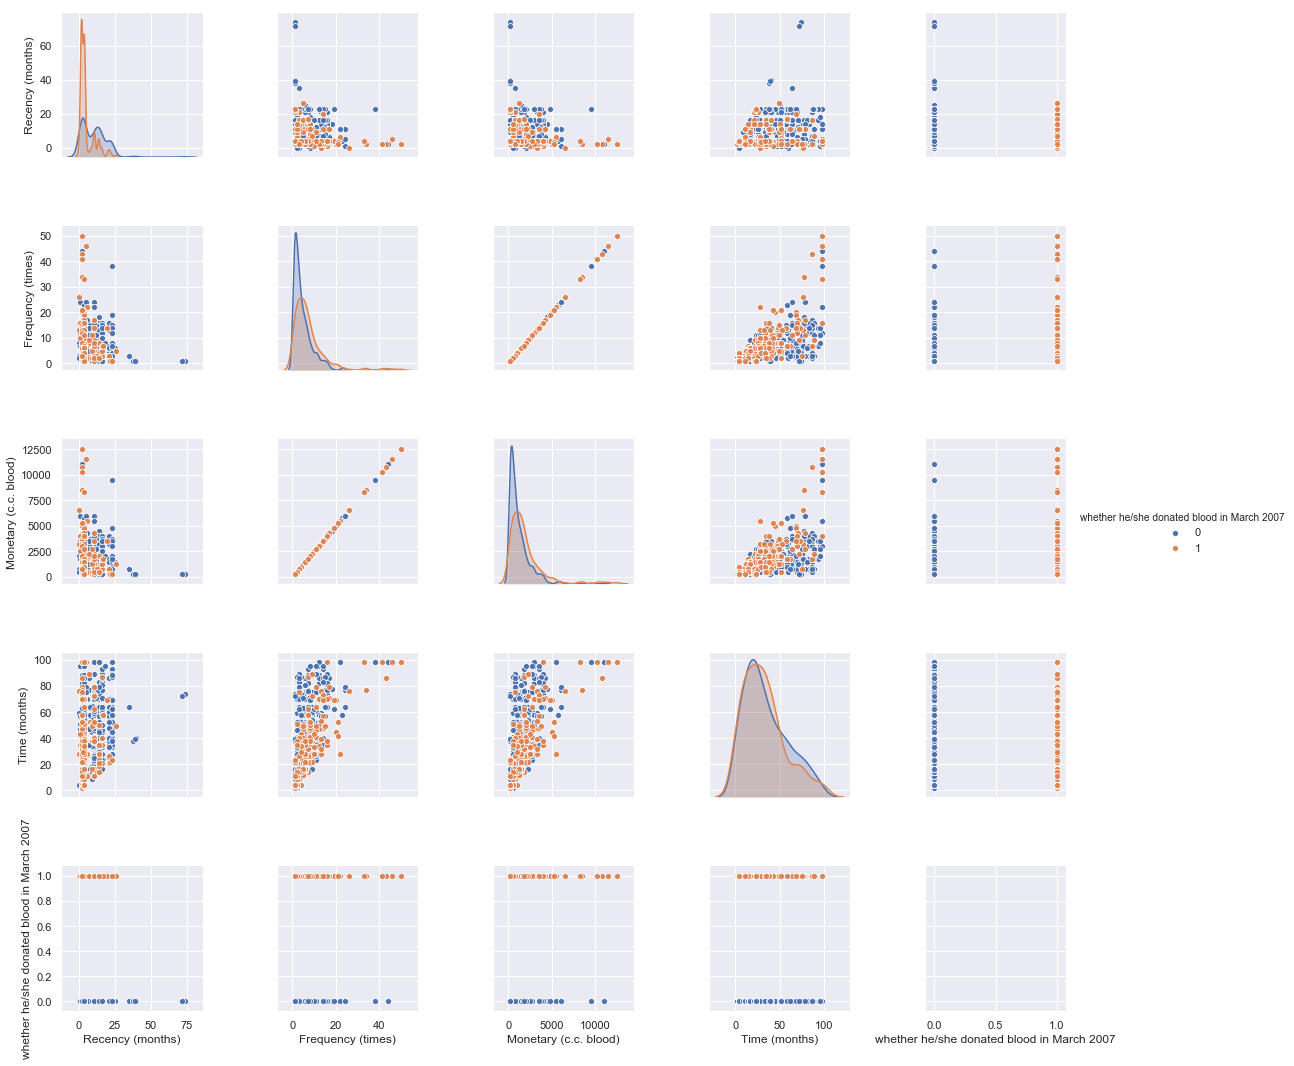

In [14]:
#VARIABLES MEJOR CORRELACIONADAS EXPRESADO EN UN DIAGRAMA DE DISPERSION
print('VARIABLES CORRELACIONADAS POR DIAGRAMA DE DISPERSION:\n');
sns.pairplot( datos.dropna(), hue='whether he/she donated blood in March 2007', height=3, kind='scatter' );

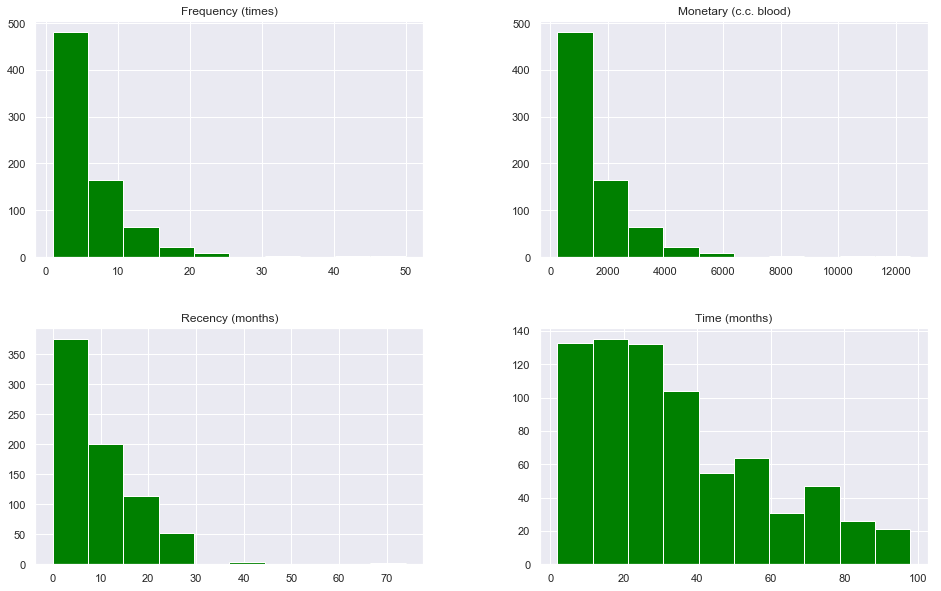

In [18]:
#SE ANALIZAN LAS DISTRIBUCIONES DE LAS CARACTERISTICAS SIN INCLUIR EL CAMPO DE DONACIÓN
datos.drop(['whether he/she donated blood in March 2007'], axis=1).hist(color = "green")
plt.show()

In [19]:
#DATOS SE SELECCIONA EL NUMERO TOTAL DE DONACIONES Y LA CANTIDAD DE SANGRE DONADA
X = datos.iloc[:,0:4];
#DATOS OBJETIVO
Y = datos.iloc[:,4];

#SE ANALIZA CUALES SON LOS MEJORES DATOS PARA EL ENTRENAMIENTO
MejoresDatos = SelectKBest(k=3);
X_new = MejoresDatos.fit_transform(X, Y);
X_new.shape;
selected = MejoresDatos.get_support(indices=True);
print('MEJORES DATOS A USAR:\n')
print(X.columns[selected]);
print('\n');

#SE ASIGNA LA NUEVA X CON LOS MEJORES DATOS 
X_NUEVA = datos.iloc[:, selected ];

MEJORES DATOS A USAR:

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)'], dtype='object')




VARIABLES CORRELACIONADAS POR MAPA DE CALOR


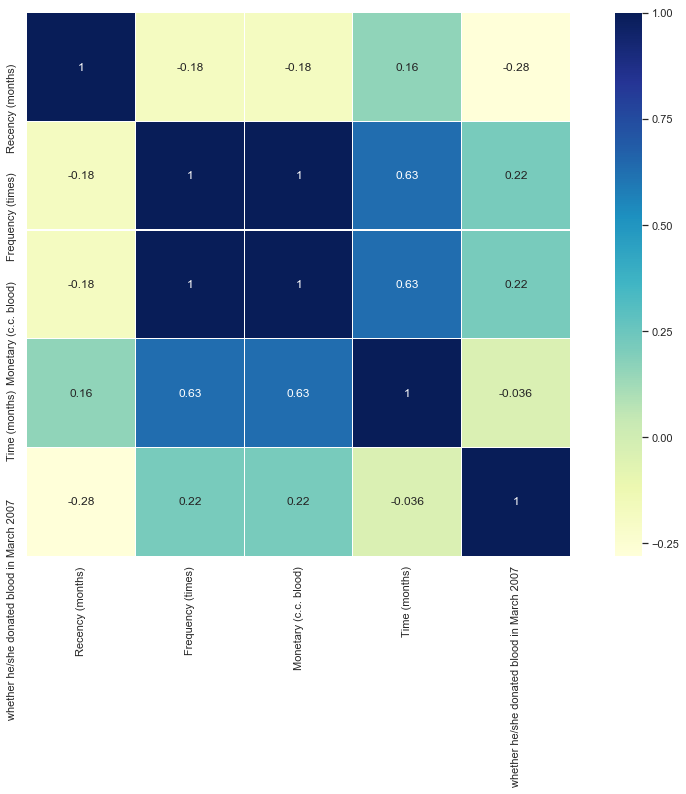

In [22]:
print('VARIABLES CORRELACIONADAS POR MAPA DE CALOR');
#OTRA FORMA DE MOSTRAR LA CORRELACION DE LAS VARIABLES MEDIANTE UN MAPA DE CALOR
sns.heatmap(datos.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap="YlGnBu");

**4. Entrene un modelo de Naive Bayes variando la proporción existente entre los datos de entrenamiento y los datos de prueba.**

In [24]:
#SE ENTRENA EL PRIMER MODELO  CON UN 10%  DE VERIFICACIÓN
X_train1, X_test1, Y_train1, Y_test1 = ms.train_test_split(X_NUEVA, Y, test_size = 0.1);
#SE INICIA EL CLASIFICADOR
gnb1 = GaussianNB();
#SE ENTRENA EL MODELO
gnb1.fit(X_train1.values, Y_train1.values);

In [25]:
#SE ENTRENA EL SEGUNDO MODELO  CON UN 20%  DE VERIFICACIÓN
X_train2, X_test2, Y_train2, Y_test2 = ms.train_test_split(X_NUEVA, Y, test_size = 0.2);
#SE INICIA EL CLASIFICADOR
gnb2 = GaussianNB();
#SE ENTRENA EL MODELO
gnb2.fit(X_train2, Y_train2);

In [26]:
#SE ENTRENA EL TERCER MODELO  CON UN 30%  DE VERIFICACIÓN
X_train3, X_test3, Y_train3, Y_test3 = ms.train_test_split(X_NUEVA, Y, test_size = 0.3);
#SE INICIA EL CLASIFICADOR
gnb3 = GaussianNB();
#SE ENTRENA EL MODELO
gnb3.fit(X_train3, Y_train3);

**5. Evalúe la efectividad de cada uno de los modelos.**

In [34]:
#SE HACE VALIDACIÓN DE LA PREDICCION, PARA VERLO SE DEBE IMPRIMIR LAS VARIABLES comp1, comp2 y comp3
y_pred = gnb1.predict(X_test1);
comp1  = pd.DataFrame({'Y-OBJETIVO': Y_test1, 'Y-PRONOSTICADA': y_pred });

print('1) Clase Objetivo VS Clase Predicha del primer modelo con 10% de prueba\n')
print(comp1.head(10))

y_pred2 = gnb2.predict(X_test2);
comp2   = pd.DataFrame({'Y-OBJETIVO': Y_test2, 'Y-PRONOSTICADA': y_pred2 });

print('\n2) Clase Objetivo VS Clase Predicha del segundo modelo con 20% de prueba\n')
print(comp1.head(10))

y_pred3 = gnb3.predict(X_test3);
comp3   = pd.DataFrame({'Y-OBJETIVO': Y_test3, 'Y-PRONOSTICADA': y_pred3 });

print('\n3) Clase Objetivo VS Clase Predicha predicha del tercer modelo con 30% de prueba\n')
print(comp1.head(10))

#SE CALCULA LA EFECTIVIDAD DE CADA MODELO 
efectividadModelo1 = gnb1.score(X_test1, Y_test1);
efectividadModelo2 = gnb2.score(X_test2, Y_test2);
efectividadModelo3 = gnb3.score(X_test3, Y_test3);

print("\n\nEfectividad del modelo con un 10% de datos de prueba: " + str( efectividadModelo1 ) );
print("Efectividad del modelo con un 20% de datos de prueba: "   + str( efectividadModelo2 ) );
print("Efectividad del modelo con un 30% de datos de prueba: "   + str( efectividadModelo3 ) );

1) Clase Objetivo VS Clase Predicha del primer modelo con 10% de prueba

     Y-OBJETIVO  Y-PRONOSTICADA
218           0               0
477           0               0
549           1               0
276           0               0
480           0               0
277           0               0
713           0               0
663           0               0
714           0               0
323           1               0

2) Clase Objetivo VS Clase Predicha del segundo modelo con 20% de prueba

     Y-OBJETIVO  Y-PRONOSTICADA
218           0               0
477           0               0
549           1               0
276           0               0
480           0               0
277           0               0
713           0               0
663           0               0
714           0               0
323           1               0

3) Clase Objetivo VS Clase Predicha predicha del tercer modelo con 30% de prueba

     Y-OBJETIVO  Y-PRONOSTICADA
218           0               0
4

**6. Construya una gráfica que relaciona la cantidad de datos usados para el entrenamiento con la efectividad obtenida para el modelo y describa sus hallazgos.**

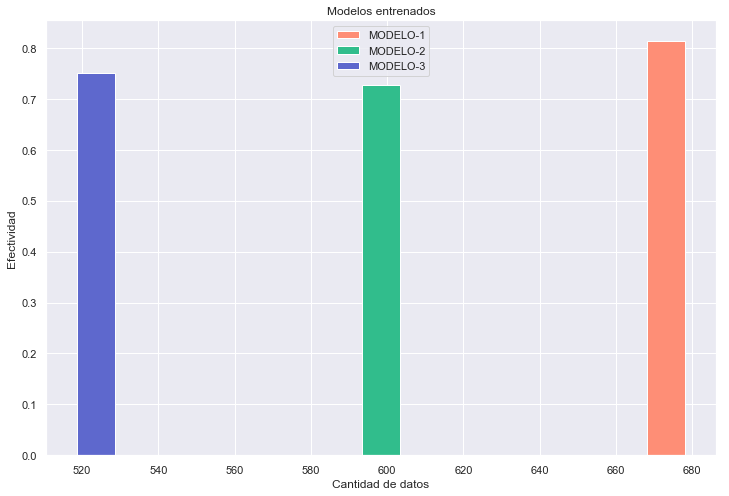

In [35]:
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL PRIMER MODELO
cantidadDatos1erModelo = len(X.index) - (len(X.index)*10)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL SEGUNDO MODELO
cantidadDatos2doModelo = len(X.index) - (len(X.index)*20)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL TERCER MODELO
cantidadDatos3erModelo = len(X.index) - (len(X.index)*30)/100;

# configurando el tamaño de la figura
plt.figure( figsize=(12, 8) );

plt.bar(cantidadDatos1erModelo, efectividadModelo1, facecolor='#FE8E76', edgecolor='white',width=10, label='MODELO-1' );
plt.bar(cantidadDatos2doModelo, efectividadModelo2, facecolor='#31BD8C', edgecolor='white', width=10, label='MODELO-2');
plt.bar(cantidadDatos3erModelo, efectividadModelo3, facecolor='#5E68CD', edgecolor='white',width=10, label='MODELO-3');

plt.title('Modelos entrenados');
plt.xlabel('Cantidad de datos');
plt.ylabel('Efectividad');
plt.legend(loc='best')
plt.show();

**Con la grafica de barras se puede ver que el modelo de Naive Bayes lineal genera una efectividad muy alta, mostrando que el mejor modelo fue el usado con un 10% de los datos usados en la verificación.**

**Por otra parte se resalta  preprocesamiento de los datos y caracteristicas realizado con el fin de mejorar los resultados, asi como la rapidez y sencilles de implementacion del modelo con conjuntos de datos pequeños .**